# Исследование закономерностей успешности компьютерной игры

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные до 2016 года о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


### Открываем файл с данными и изучаем обущую информацию

**Импортируем все необходимые библиотеки. Считываем данные из csv-файла в датафрейм и сохраняем в переменную data. 
Выводим первые 5 строчек датафрейма data на экран.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Изучаем общую информацию о датафрейме data с помощью метода info()**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Строим общую гистограмму для всех числовых столбцов таблицы**

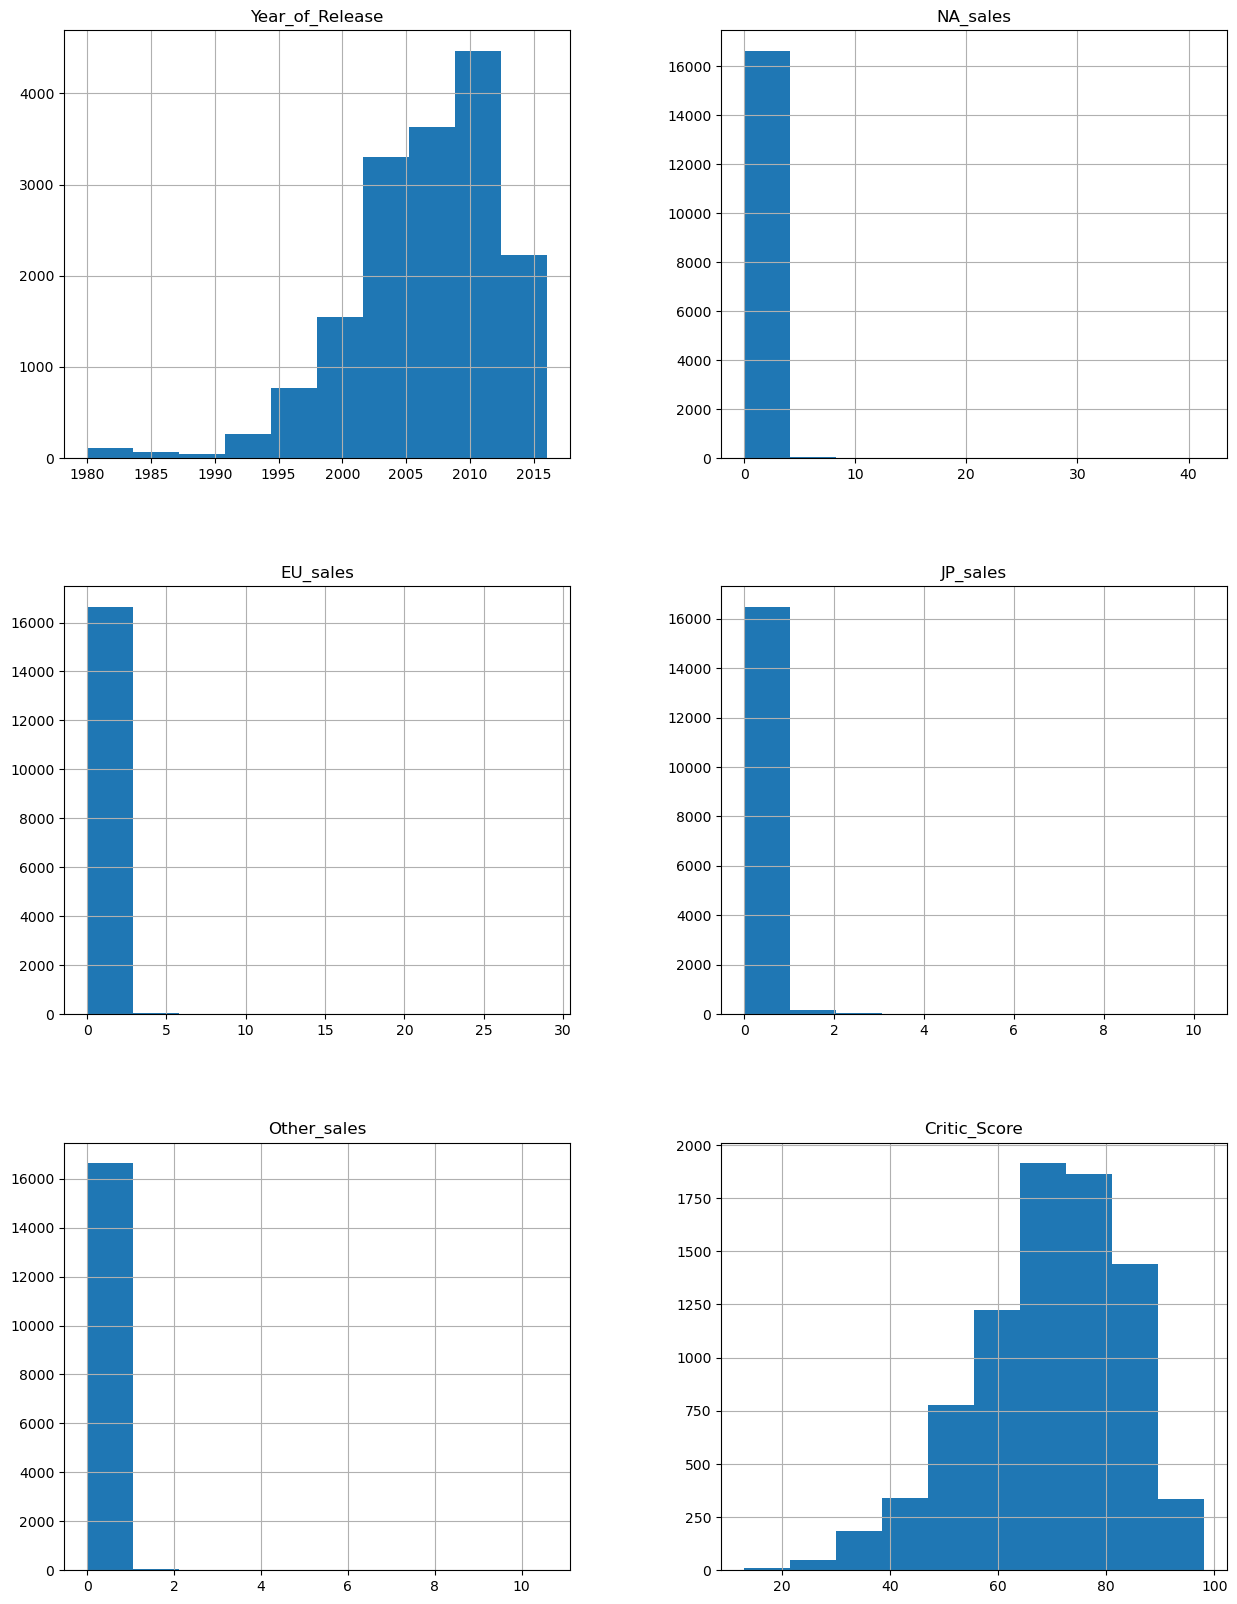

In [5]:
data.hist(figsize=(15, 20))
plt.show()

На общей гистограмме для всех числовых столбцов мы видим, что показатели по продажам в Северной Америке, Европе, Японии и других странах довольно сильно похожи. Гистограммы с оценками критиков и пользователей также похожи и показывают, что чаще всего критики ставят оценку 70 или 80 (из 100), а игроки 7-8 (из 10). В дальнейшем в ходе исследовательского анализа мы проверим одинаково ли влияют эти оценки на продажи игр.

### Предобработка данных

#### Изменение названий столбцов, приведение их к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработка пропусков

**Изучим пропущенные значения в столбцах. Определим, в каких столбцах есть пропуски, и их количество**

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Пропуски обнаружены в столбцах `name`, `year_of_release`, `genre`,`critic_score`,`user_score` и `rating`. В столбцах `name` и `year_of_release` довольно мало пропущенных значений, поэтому мы их удалим. Пропуски в столбце `name` и `genre` могут быть связаны с тем, что их забыли указать. Пропуски в столбце `year_of_release` могут быть связаны с тем, что точная дата выпуска игры неизвестна или её также забыли указать.**

In [9]:
data = data.dropna(subset = ['name','genre','year_of_release'])

**Пропуски в столбцах `critic_score` и `user_score` оставим как есть, так как пропуски в данных столбцах могли появиться из-за того, что критики или пользователи не захотели оценивать игру, также возможно, что выход игры не был должным образом освещен и многие просто о ней не знали.**

**Пропуски в столбце `rating` заполним undefined, так как скорее всего, если в рейтинге от организации ESRB стоит пропуск, то рейтинг не определен.**

In [10]:
data['rating'] = data['rating'].fillna('undefined')

Изучим пропуски после работы с ними

In [11]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

**Изучим уникальные значения в столбце `user_score`.**

In [12]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**В столбце `user_score` обнаружено значение tbd. Это аббревиатура, которая расщифровывается как To Be Determined, то есть будет определено. Такое значение может появиться, так как разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату. Заменим tbd на NaN в столбце `user_score` с помощью функции.**

In [13]:
def replace_wrong_scores (wrong_value, correct_value):
    data['user_score'] = data['user_score'].replace(wrong_value, correct_value)
replace_wrong_scores ('tbd', np.NaN)

**Проверим уникальные значения в столбце `user_score` после применения функции.**

In [14]:
data['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Значение tbd заменено

#### Изменение типов данных

**Находим столбцы, в которых нужно изменить тип данных. К таким столбцам относятся `year_of_release`,`user_score`.
В столбце `year_of_release` тип данных float64, мы можем заменить его на int64, так как год - это всегда целое число. В столбце `user_score` тип данных object. Заменим его на float64, так как оценки пользователей - это всегда числовые значения**

In [15]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [16]:
data['user_score'] = data['user_score'].astype(float)

Проверим, что получилось, выведем общую информацию о датафрейме

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


#### Добавление нового столбца в таблицу с суммарными продажами по всем регионам

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Выведем первые 5 строк таблицы, чтобы проверить, что новый столбец `total_sales` добавился в датафрейм.**

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


**Используем метод describe() для получения характеристик, дающих представление о столбцах датафрейма, чтобы выявить возможные выбросы и аномалии.**

In [20]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330,0.536023
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447,1.558786
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


После изучения данной таблицы мы не выявили никаких аномальных значений.

**Проверим датафрейм на наличие дубликатов.**


In [21]:
data.duplicated().sum()

0

### Исследовательский анализ данных

#### Изучим, какое количество игр выпускалось в разные годы. Для этого сгруппируем данные по годам выпуска с помощью pivot_table, а затем построим график, чтобы рассмотреть, как данные распределены по годам.

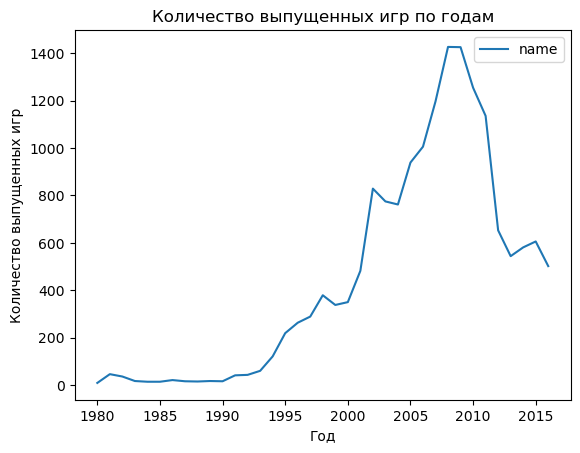

In [22]:
data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot()
plt.title("Количество выпущенных игр по годам")
plt.xlabel("Год")
plt.ylabel("Количество выпущенных игр")
plt.show()

**На графике видно, что до 1995 года количество выпущенных игр было очень маленьким, мы удалим эти данные, так как они могут исказить результаты исследования. Также мы видим, что особый рост наблюдается с 2005 года, а после 2010 резкий спад.**

#### Изучим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами, а затем построим распределение по годам. Для этого сначала сделаем сводную таблицу с суммарными продажами на разных платформах.

In [23]:
data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


По сводной таблице мы видим, что к платформам с наибольшими суммарными продажами относятся платформы PS2, X360, PS3, Wii,DS и PS.
Построим распределение по годам по 6 платформам с наибольшими суммарными продажами.

In [24]:
top_sales_group = data.query("platform == ['PS2','X360','PS3','Wii','DS','PS']")

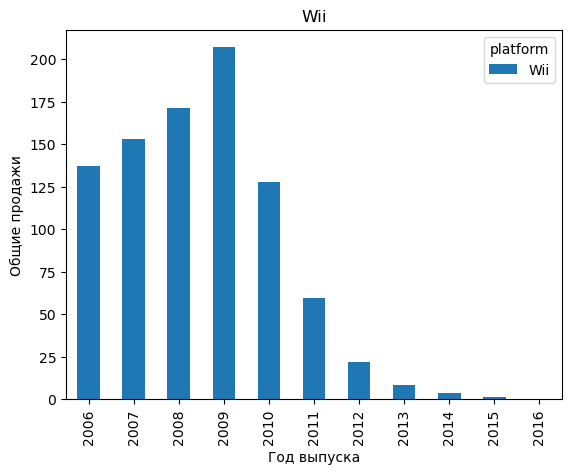

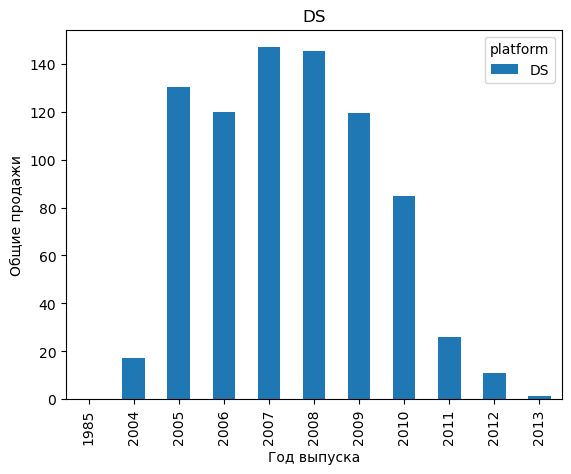

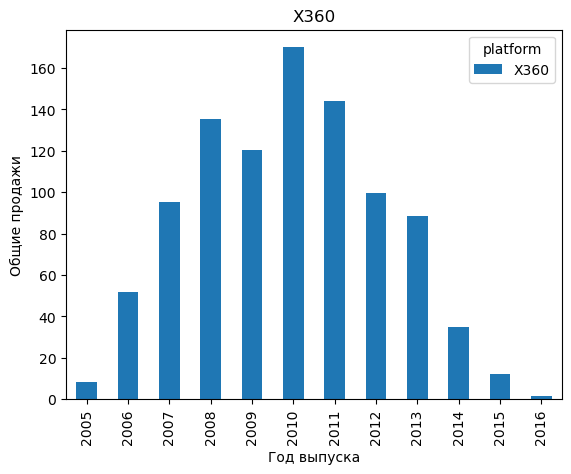

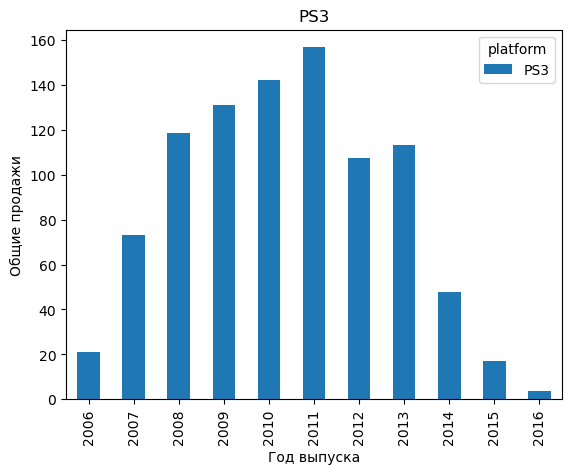

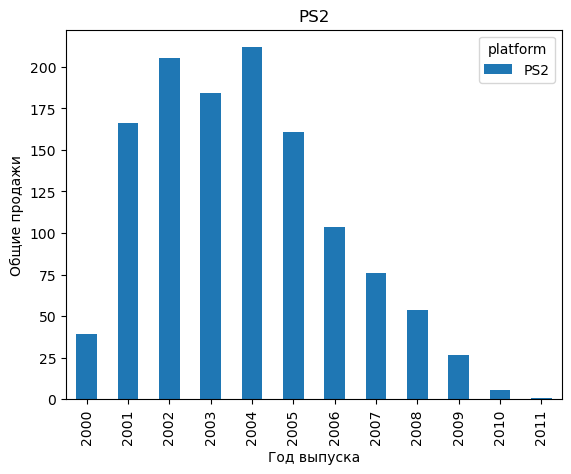

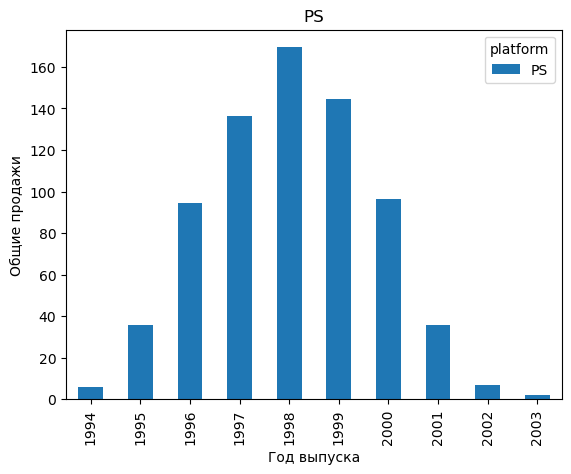

In [25]:
for i in top_sales_group['platform'].unique():
    data_group = top_sales_group.loc[top_sales_group['platform'] == i]
    data_group = data_group.pivot_table(index = 'year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    data_group.plot(kind='bar')
    plt.title(str(i))
    plt.xlabel('Год выпуска')
    plt.ylabel('Общие продажи')

**На графиках мы видим, что характерный срок для появления новых и исчезновения старых платформ - это примерно 6-8 лет.**

#### Чтобы посторить прогноз на 2017 год нам необходимо взять актуальные данные. На наш взгляд, к актуальным данных можно отнести данные за последние 3 года (с 2014 по 2016), так как в данной индустрии всё быстро меняется и развивается, такой период кажется нам наиболее оптимальным. Также мы видим, что в общем характерный срок для платформ - это 6-8 лет, но особая популярность и пик продаж длится примерно 3 года.

**Выясним, какие платформы лидируют на рынке по продажам, какие растут, а какие падают. Определим потенциально прибыльные платформы. Рассмотрим актуальные данные с 2014 по 2016 год.**

In [26]:
data_sorted = data.query ('year_of_release >= 2014')

In [27]:
data_sorted.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


**Постороим графики для всех этих платформ, чтобы рассмотреть платформы,лидирующие на рынке по продажам, подробнее.**

In [28]:
top_platforms = data_sorted.query("platform == ['PS4','XOne','3DS','PS3','X360','WiiU','PC','PSV','Wii','PSP']")

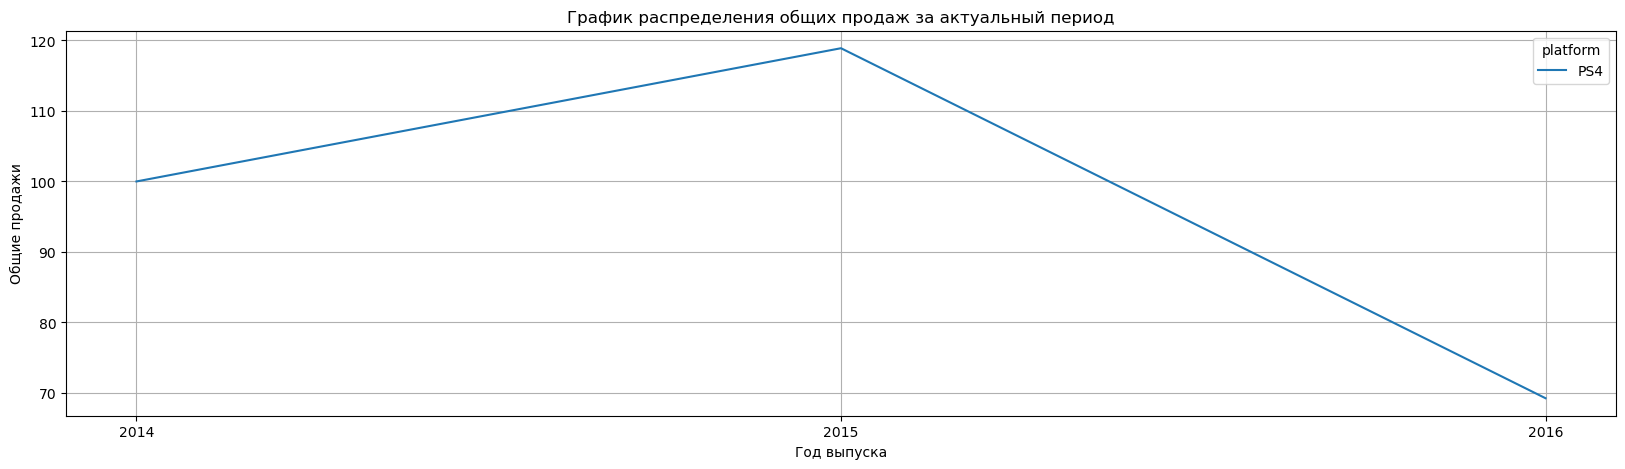

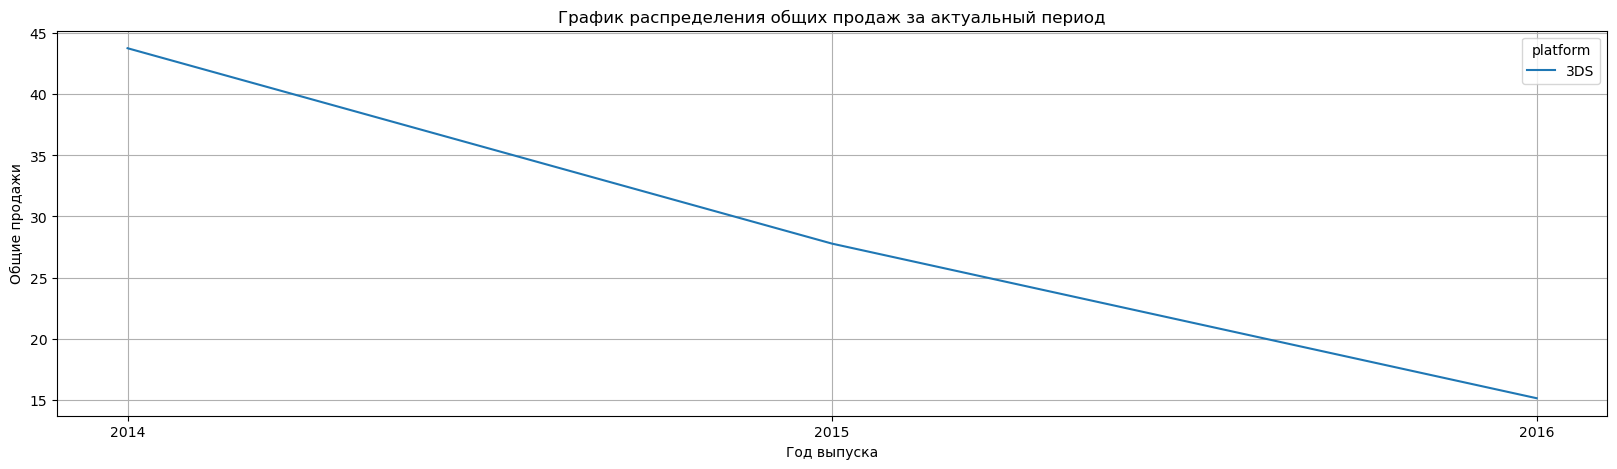

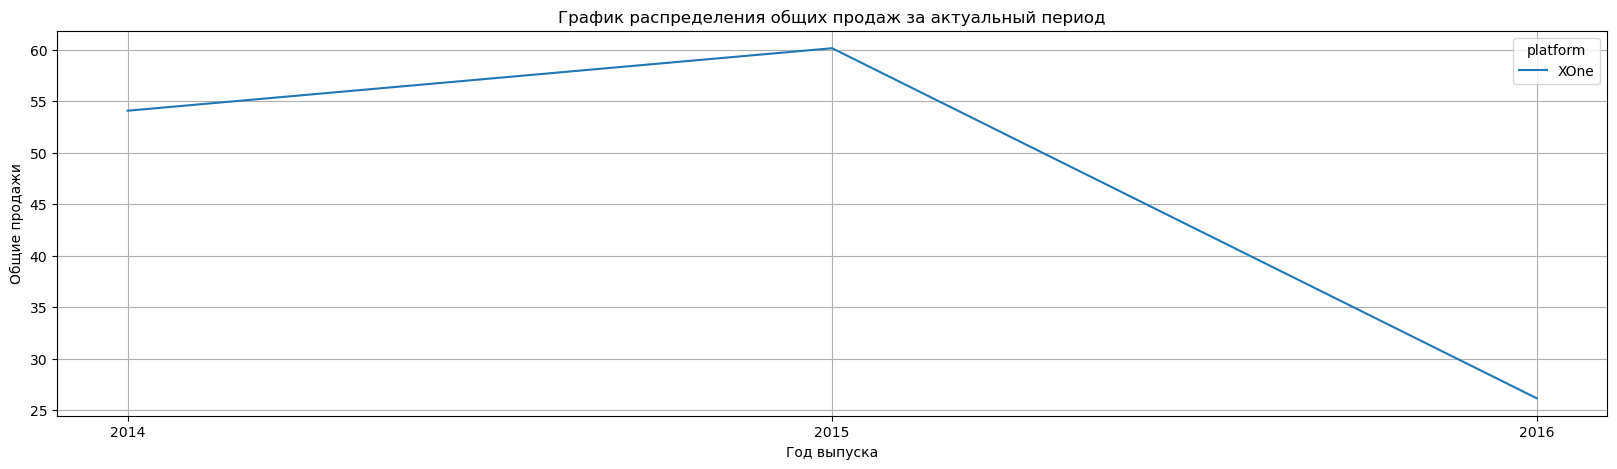

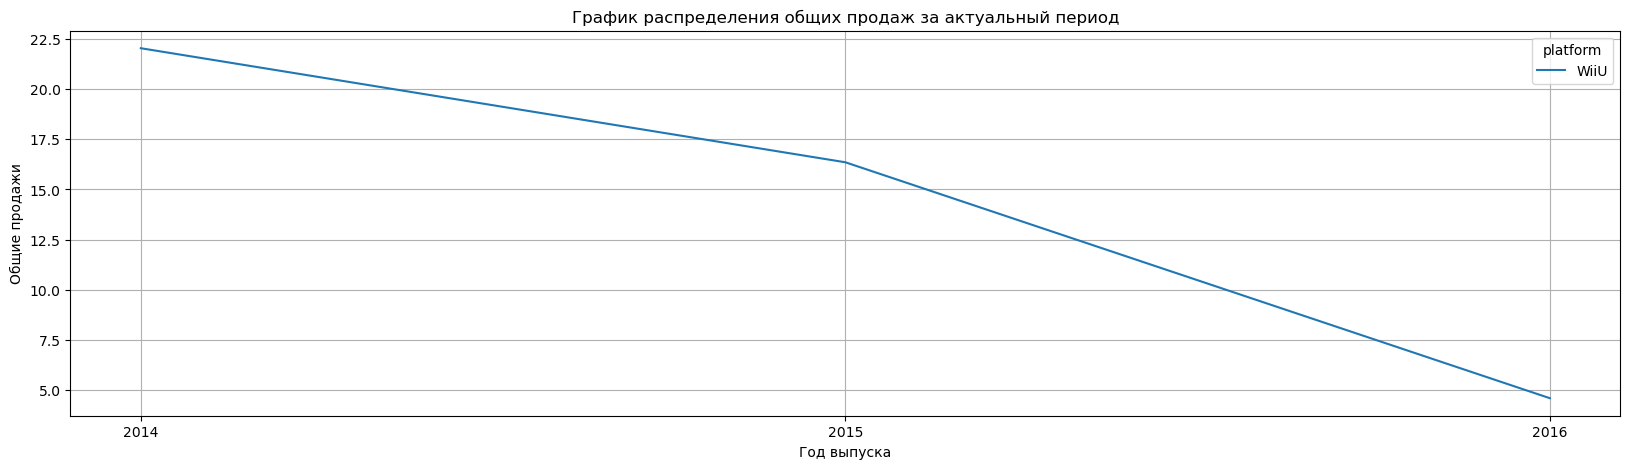

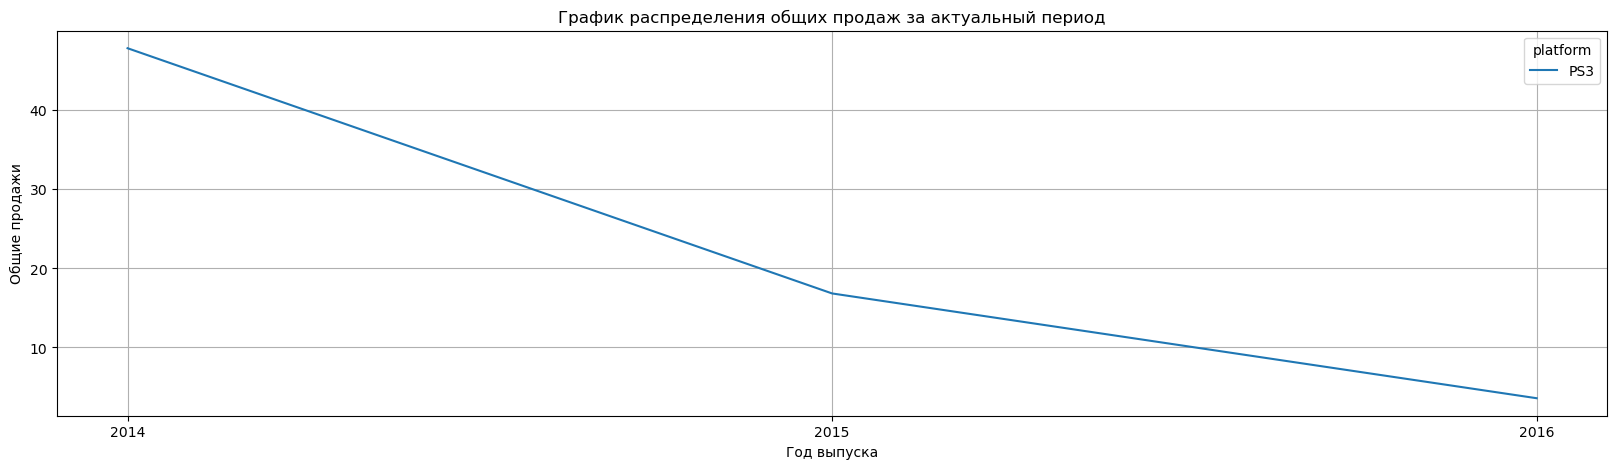

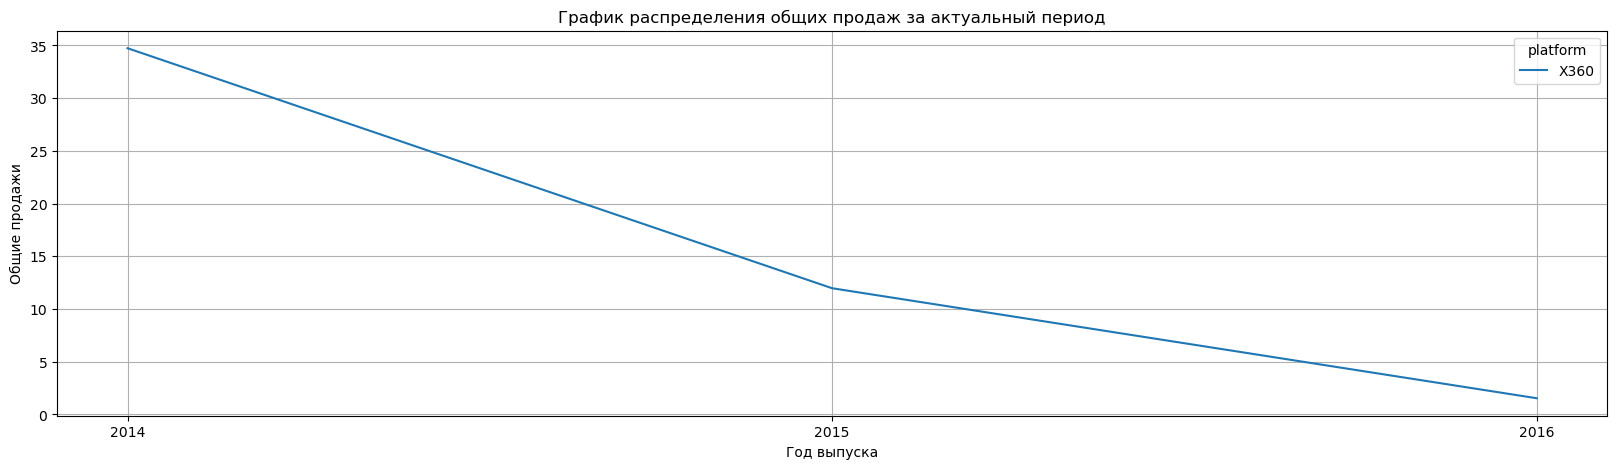

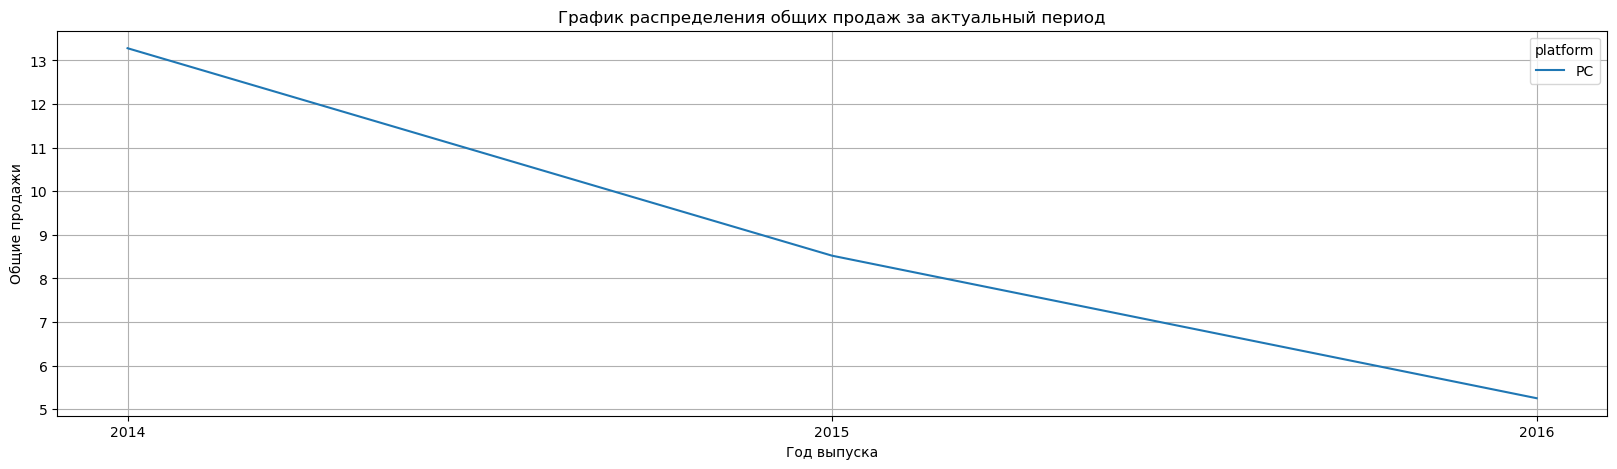

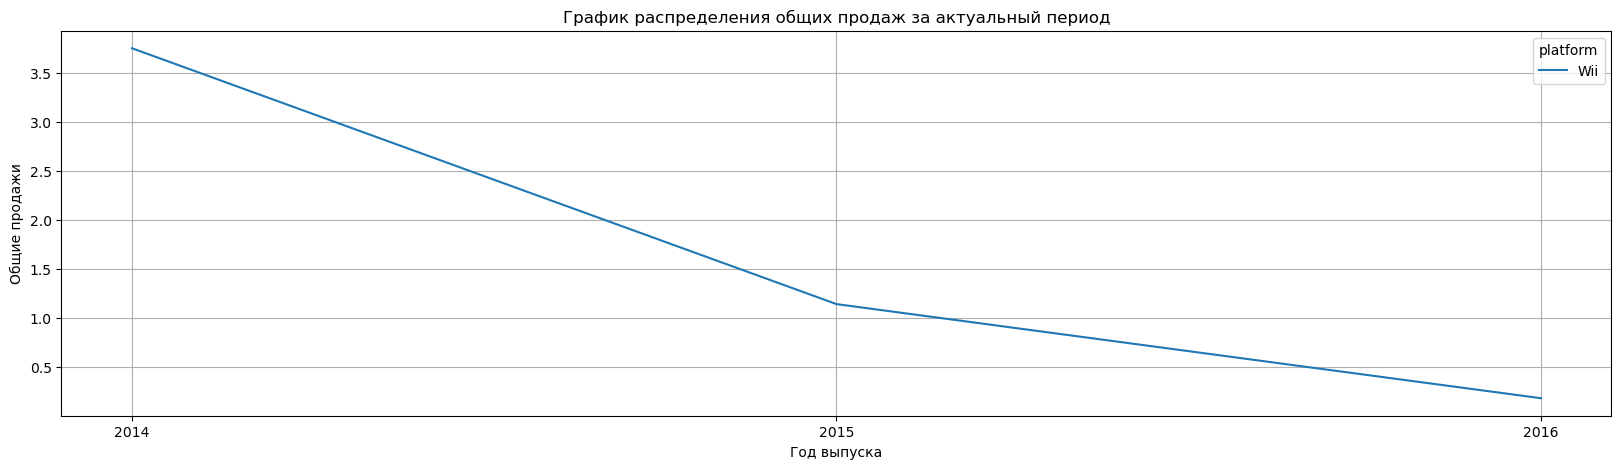

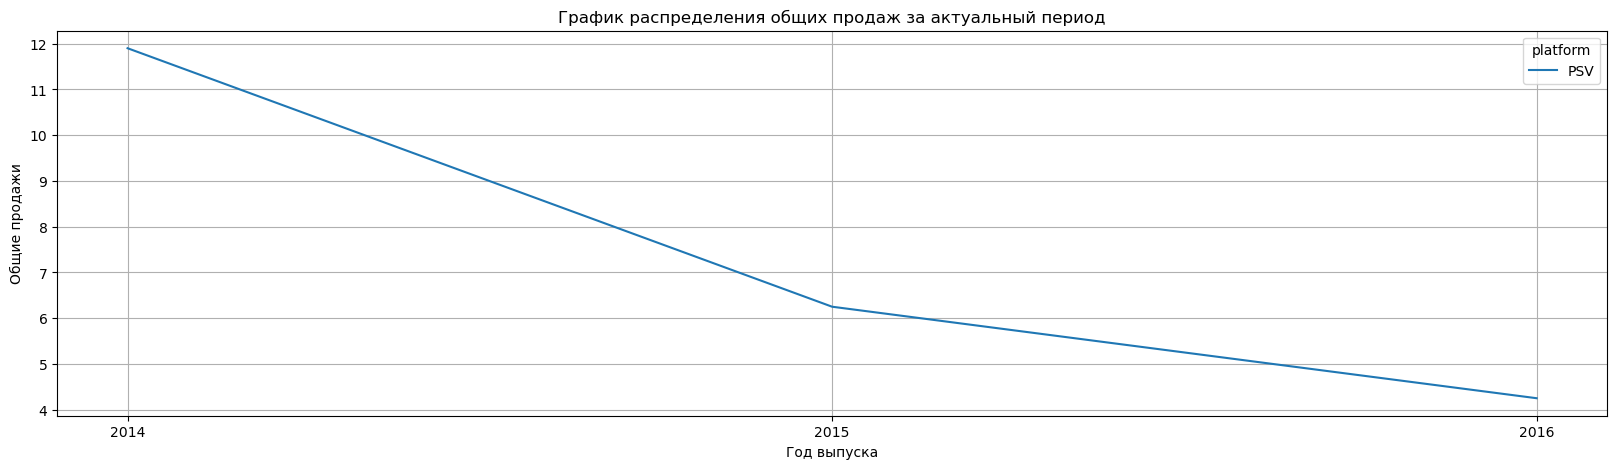

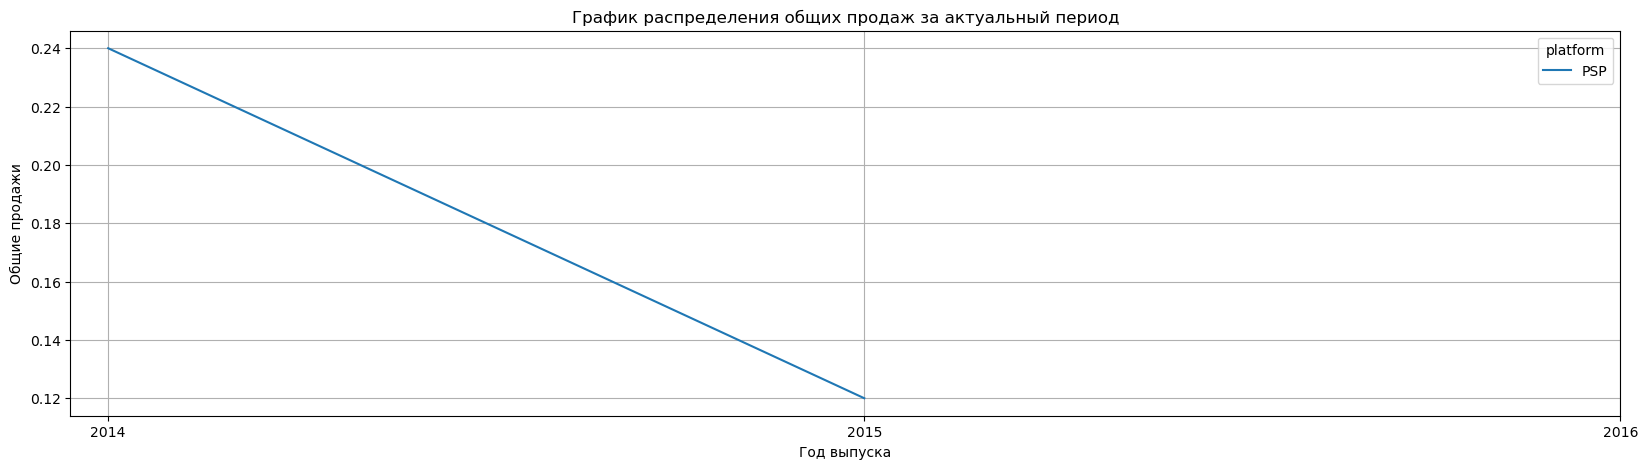

In [29]:
for i in top_platforms['platform'].unique():
    data_group = top_platforms.loc[top_platforms['platform'] == i]
    data_group = data_group.pivot_table(index = 'year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    data_group.plot(kind='line',grid=True, figsize = (20,5))
    plt.xticks([2014,2015,2016])
    plt.title('График распределения общих продаж за актуальный период')
    plt.xlabel ('Год выпуска')
    plt.ylabel('Общие продажи')


**По данным графикам мы видим, что максимальный рост наблюдался в 2015 году, за 2016 год мы имеет неполные данные, поэтому возможно спад на графиках объясняется не снижением продаж на этих платформах, а неполнотой данных. Однако если сравнивать эти платформы, то наиболее прибыльной, на наш взгляд, является PS4, так как суммарные продажи на ней намного выше по показателям, чем на других платформах. Также среди лидеров XOne и 3DS.**

#### Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам и опишем полученный результат.

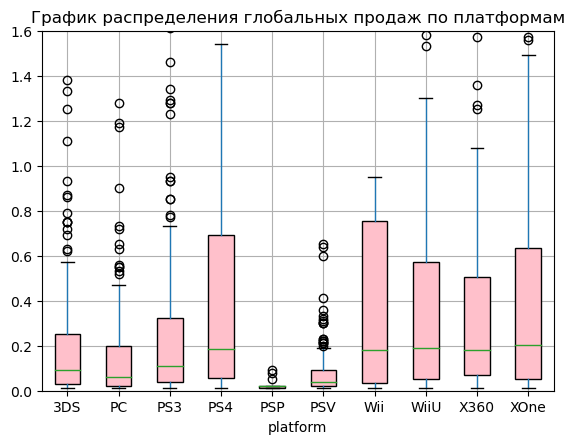

In [30]:
top_platforms.boxplot(by='platform',column='total_sales',patch_artist=True,boxprops=dict(facecolor='pink'))
plt.title('График распределения глобальных продаж по платформам')
plt.suptitle('')
plt.ylim(0,1.6)
plt.show()


**По "ящику с усами" мы видим, что медианные значения у лидирующих по продажам платформ(XOne и PS4) находятся примерно на одном уровне, значит в среднем прибыль на обеих достаточно высокая. Если посмотреть на ещё одну топовую платформу 3DS, то мы видим, что там медианное значение намного ниже, следовательно продажи на этой платформе также ниже, чем на предыдущих двух.**

**Изучив диаграмму размаха мы пришли к выводу, что обе платформы имеют выбросы и редкие значения. Однако это можно обосновать тем, что некоторые игры могли иметь аномально высокие продажи, так как, например, это могли быть продолжения очень популярных игр или компании очень хорошо вложились в рекламу, поэтому оставим данные значения.**

#### Рассмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков по актуальным данным(2014-2016 год). Для этого возьмем платформу PS4, построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

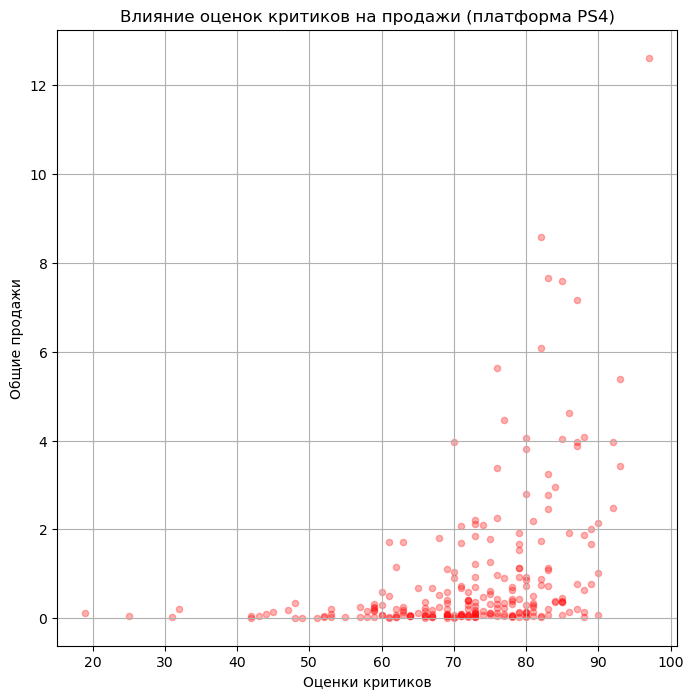

In [31]:
data_sales = data_sorted.query('platform == "PS4"')
data_sales.plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='red')
plt.title('Влияние оценок критиков на продажи (платформа PS4)')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [32]:
data_sales['total_sales'].corr(data_sales['critic_score'])

0.40266141068104083

**Коэффициент корреляции равен 0.4**

**Корреляция слабо положительная, но она есть. По графику мы также видим, что в основном довольно высокие продажи наблюдаются у игр с высоким рейтингом от критиков (от 60 до 90 баллов). У игр с низким рейтингом довольно низкие продажи и их очень мало.**

**Теперь посмотрим, как на продажи влияют оценки пользователей.**

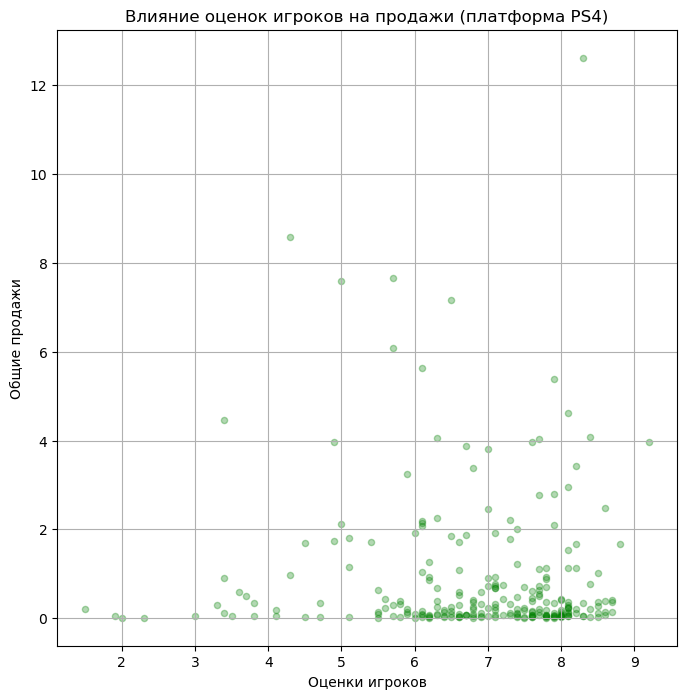

In [33]:
data_sales = data_sorted.query('platform == "PS4"')
data_sales.plot(x='user_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='green')
plt.title('Влияние оценок игроков на продажи (платформа PS4)')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи')
plt.show()

In [34]:
data_sales['total_sales'].corr(data_sales['user_score'])

-0.040131589472697356

**Коэффициент корреляции равен -0.04**

**Корреляция между оценками пользователей и продажами очень низкая, можно сказать, что она отсутсвует. На графике мы видим, что больше всего продаж наблюдается у игр с довольно высокими оценками пользователей (6-9), однако в отличие от предыдущего графика с влиянием оценок критиков на продажи игр, здесь мы видим, что есть некоторые игры с довольно низкими оценками пользователей, но с высокими продажами.**

#### Рассмотрим, как влияют оценки критиков и пользователей на продажи на других платформах за актуальный для нашего исследования период (2014-2016 год). Для этого также построим диаграммы рассеяния и посчитаем корреляцию.

In [35]:
data_sorted.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


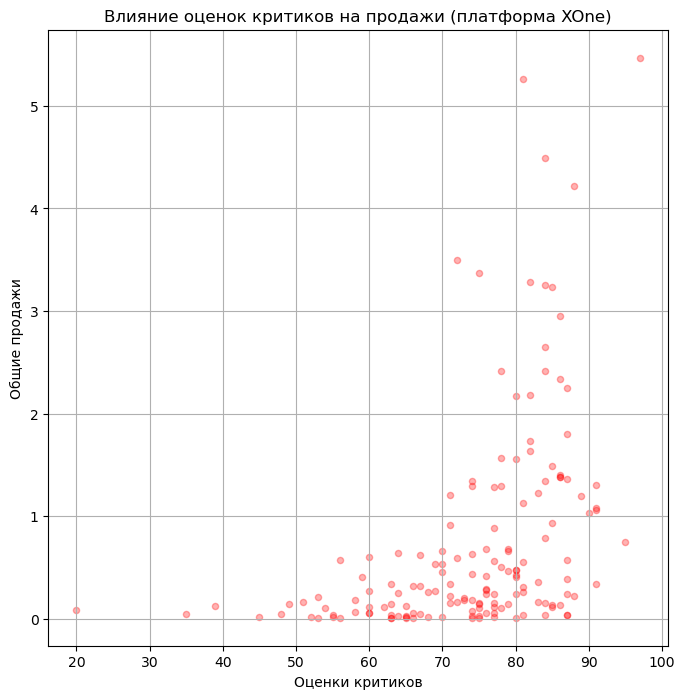

In [36]:
data_sales = data_sorted.query('platform == "XOne"')
data_sales.plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='red')
plt.title('Влияние оценок критиков на продажи (платформа XOne)')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [37]:
data_sales['total_sales'].corr(data_sales['critic_score'])

0.42867694370333226

**Коэффициент корреляции равен 0.4**

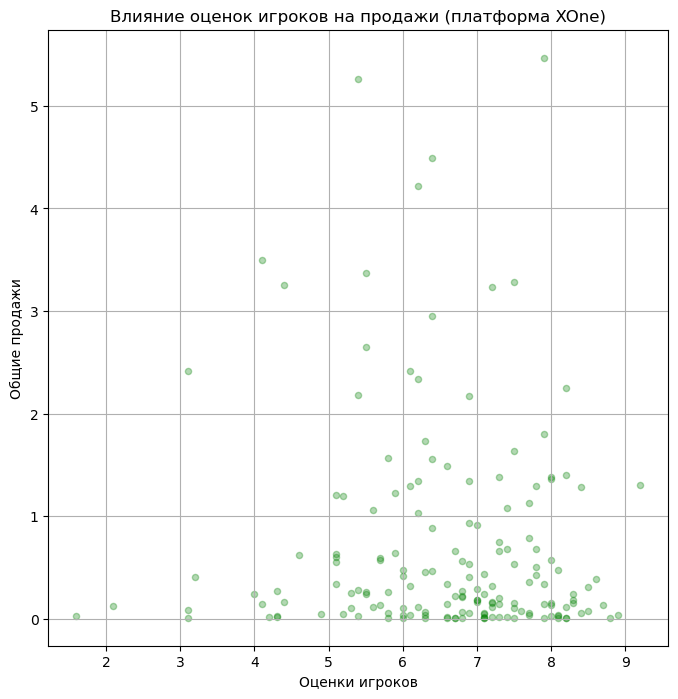

In [38]:
data_sales = data_sorted.query('platform == "XOne"')
data_sales.plot(x='user_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='green')
plt.title('Влияние оценок игроков на продажи (платформа XOne)')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи')
plt.show()

In [39]:
data_sales['total_sales'].corr(data_sales['user_score'])

-0.0703839280647581

**Коэффициент корреляции равен -0.07**

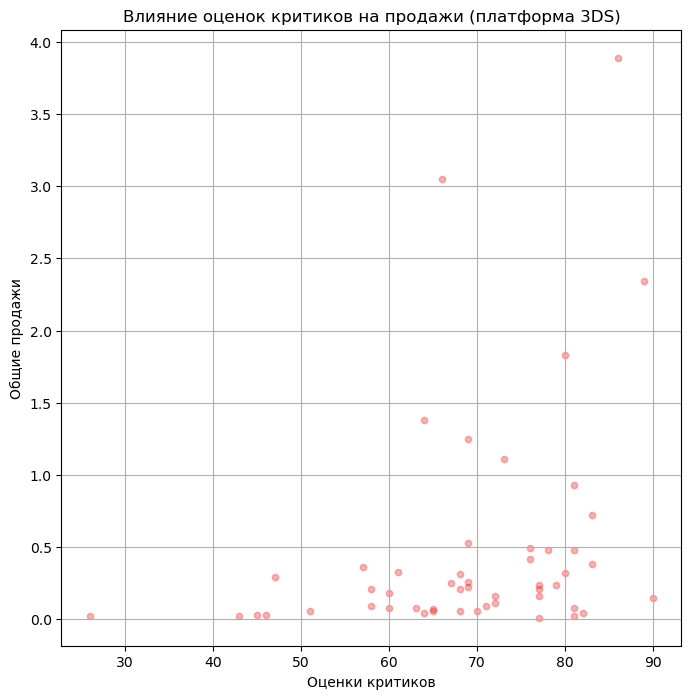

In [40]:
data_sales = data_sorted.query('platform == "3DS"')
data_sales.plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='red')
plt.title('Влияние оценок критиков на продажи (платформа 3DS)')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [41]:
data_sales['total_sales'].corr(data_sales['critic_score'])

0.31411749286905105

**Коэффициент корреляции равен 0.3**

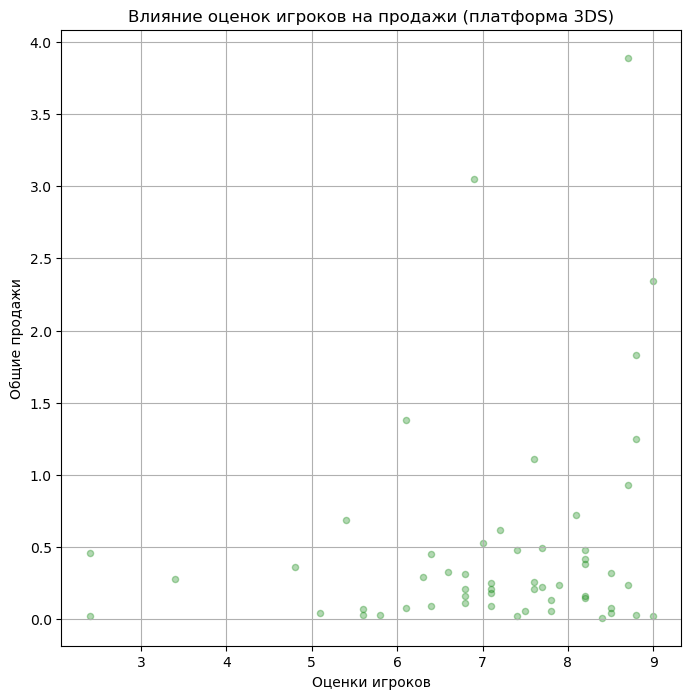

In [42]:
data_sales = data_sorted.query('platform == "3DS"')
data_sales.plot(x='user_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='green')
plt.title('Влияние оценок игроков на продажи (платформа 3DS)')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи')
plt.show()

In [43]:
data_sales['total_sales'].corr(data_sales['user_score'])

0.2151932718527028

**Коэффициент корреляции равен 0.2**

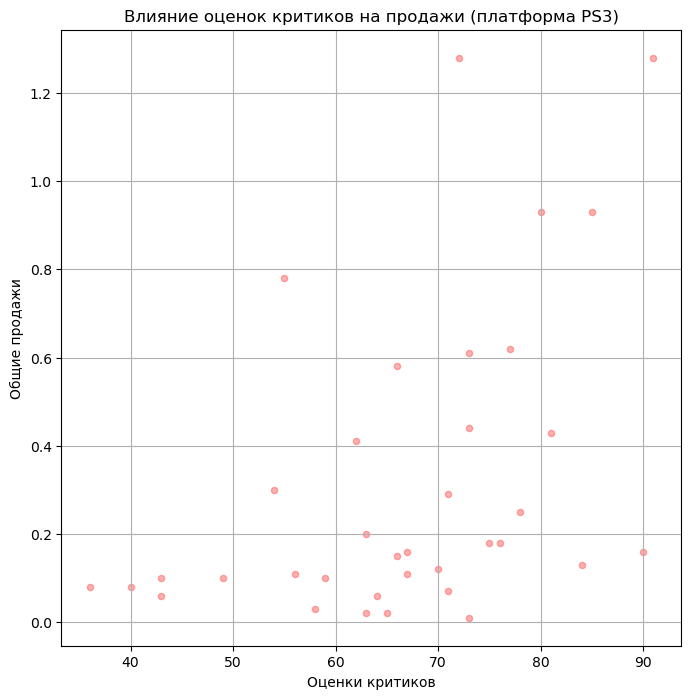

In [44]:
data_sales = data_sorted.query('platform == "PS3"')
data_sales.plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='red')
plt.title('Влияние оценок критиков на продажи (платформа PS3)')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [45]:
data_sales['total_sales'].corr(data_sales['critic_score'])

0.44657460493190704

**Коэффициент корреляции равен 0.4**

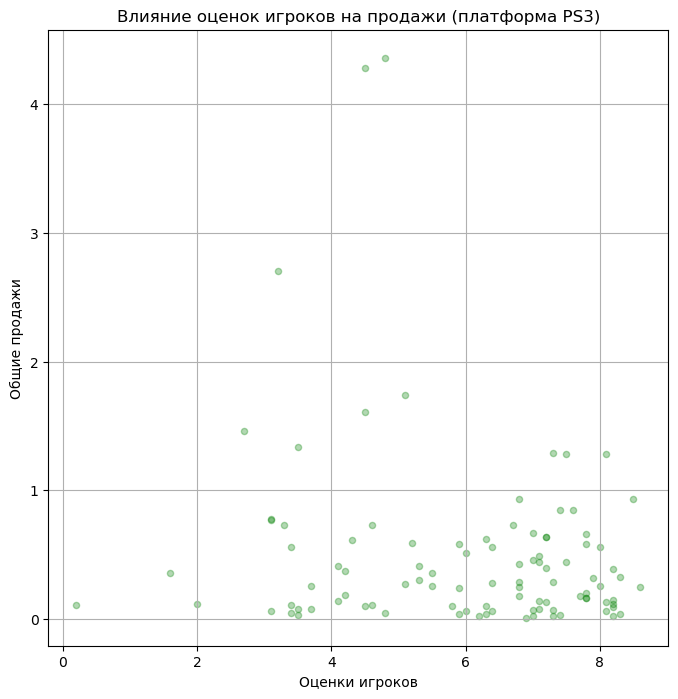

In [46]:
data_sales = data_sorted.query('platform == "PS3"')
data_sales.plot(x='user_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='green')
plt.title('Влияние оценок игроков на продажи (платформа PS3)')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи')
plt.show()

In [47]:
data_sales['total_sales'].corr(data_sales['user_score'])

-0.16676141347662116

**Коэффициент корреляции равен -0.2**

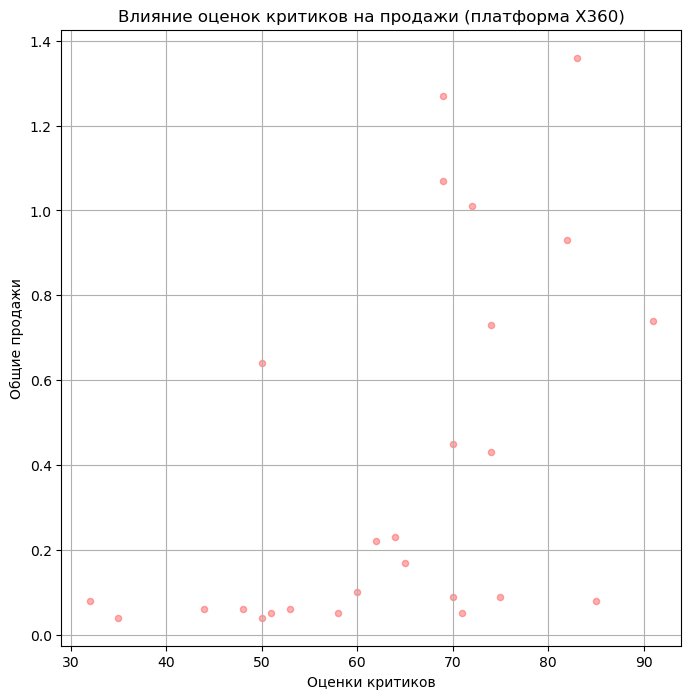

In [48]:
data_sales = data_sorted.query('platform == "X360"')
data_sales.plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='red')
plt.title('Влияние оценок критиков на продажи (платформа X360)')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [49]:
data_sales['total_sales'].corr(data_sales['critic_score'])

0.5257228356581523

**Коэффициент корреляции равен 0.5**

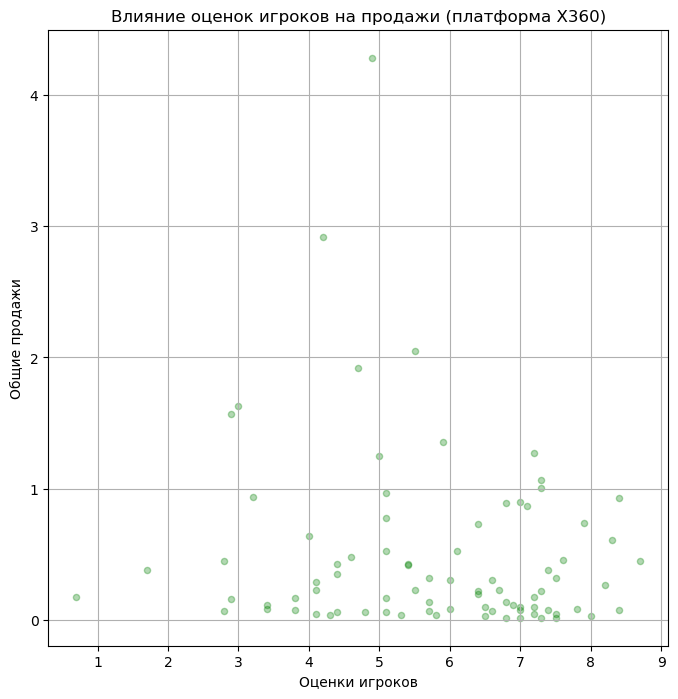

In [50]:
data_sales = data_sorted.query('platform == "X360"')
data_sales.plot(x='user_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='green')
plt.title('Влияние оценок игроков на продажи (платформа X360)')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи')
plt.show()

In [51]:
data_sales['total_sales'].corr(data_sales['user_score'])

-0.138444570945665

**Коэффициент корреляции равен -0.1**

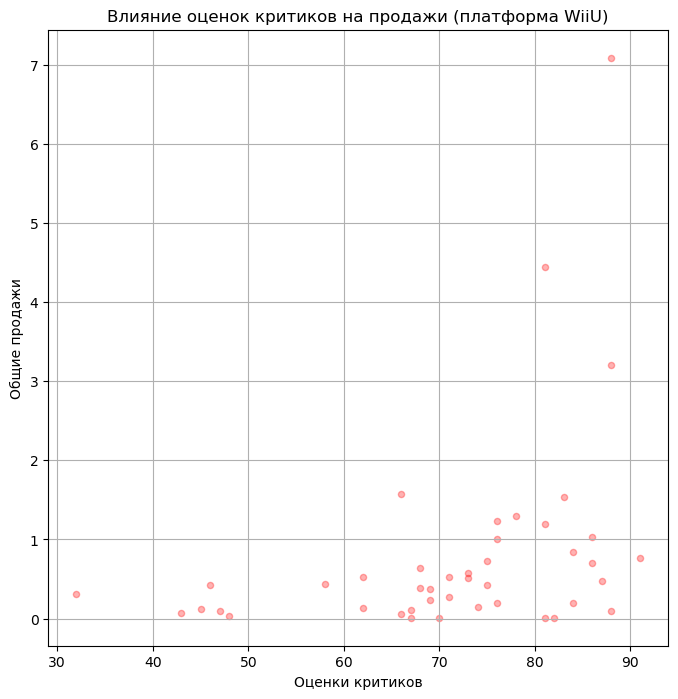

In [52]:
data_sales = data_sorted.query('platform == "WiiU"')
data_sales.plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='red')
plt.title('Влияние оценок критиков на продажи (платформа WiiU)')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [53]:
data_sales['total_sales'].corr(data_sales['critic_score'])

0.370201412480884

**Коэффициент корреляции равен 0.4**

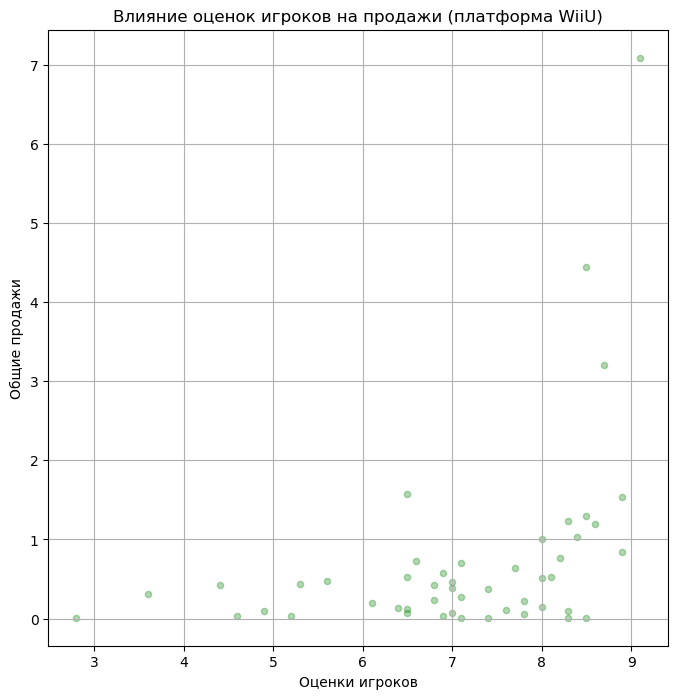

In [54]:
data_sales = data_sorted.query('platform == "WiiU"')
data_sales.plot(x='user_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='green')
plt.title('Влияние оценок игроков на продажи (платформа WiiU)')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи')
plt.show()

In [55]:
data_sales['total_sales'].corr(data_sales['user_score'])

0.4079264579217078

**Коэффициент корреляции равен 0.4**

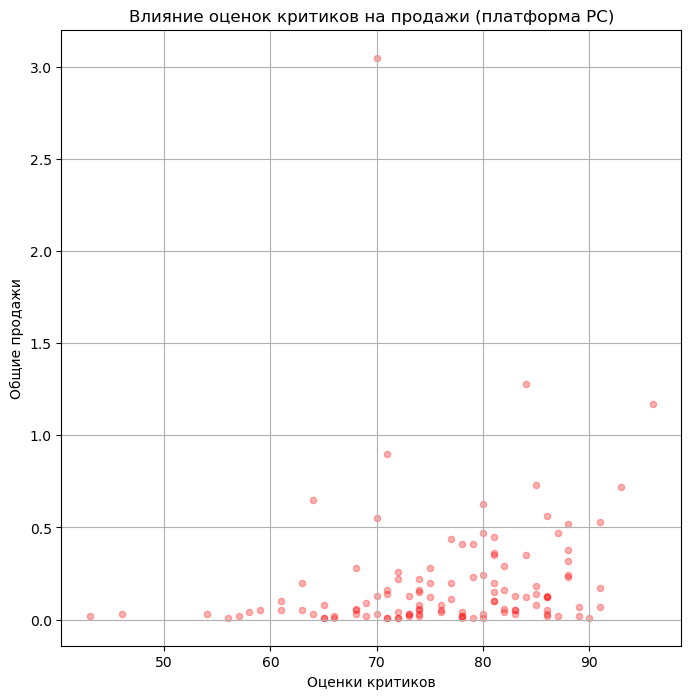

In [56]:
data_sales = data_sorted.query('platform == "PC"')
data_sales.plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='red')
plt.title('Влияние оценок критиков на продажи (платформа PC)')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [57]:
data_sales['total_sales'].corr(data_sales['critic_score'])

0.17463413769350036

**Коэффициент корреляции равен 0.2**

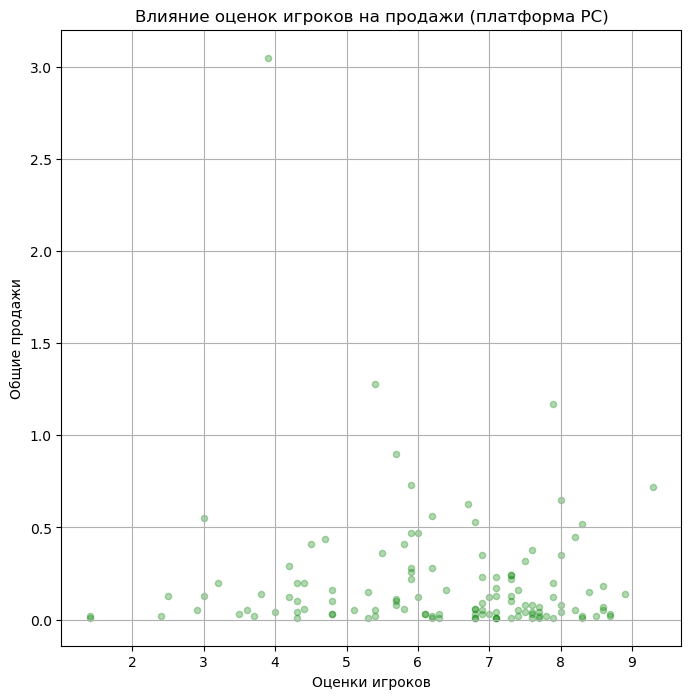

In [58]:
data_sales = data_sorted.query('platform == "PC"')
data_sales.plot(x='user_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='green')
plt.title('Влияние оценок игроков на продажи (платформа PC)')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи')
plt.show()

In [59]:
data_sales['total_sales'].corr(data_sales['user_score'])

-0.07159665703472452

**Коэффициент корреляции равен -0.07**

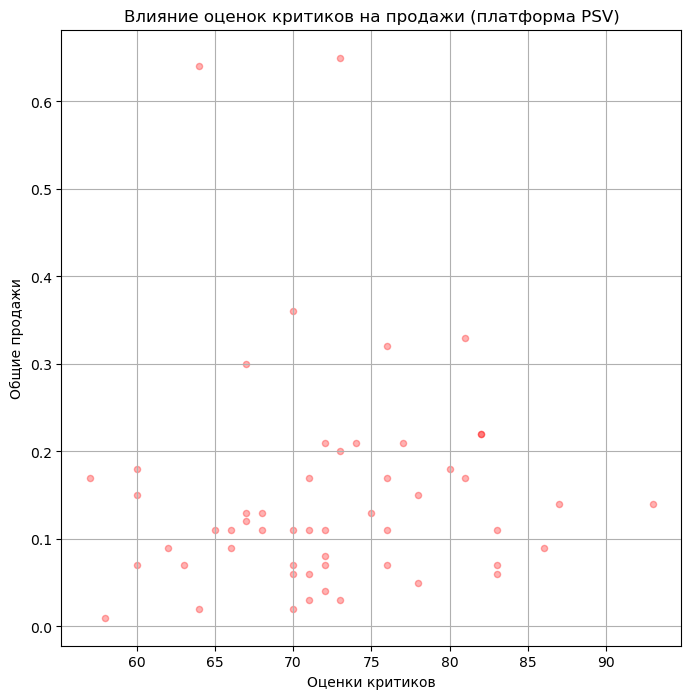

In [60]:
data_sales = data_sorted.query('platform == "PSV"')
data_sales.plot(x='critic_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='red')
plt.title('Влияние оценок критиков на продажи (платформа PSV)')
plt.xlabel('Оценки критиков')
plt.ylabel('Общие продажи')
plt.show()

In [61]:
data_sales['total_sales'].corr(data_sales['critic_score'])

0.04266490657009526

**Коэффициент корреляции равен 0.04**

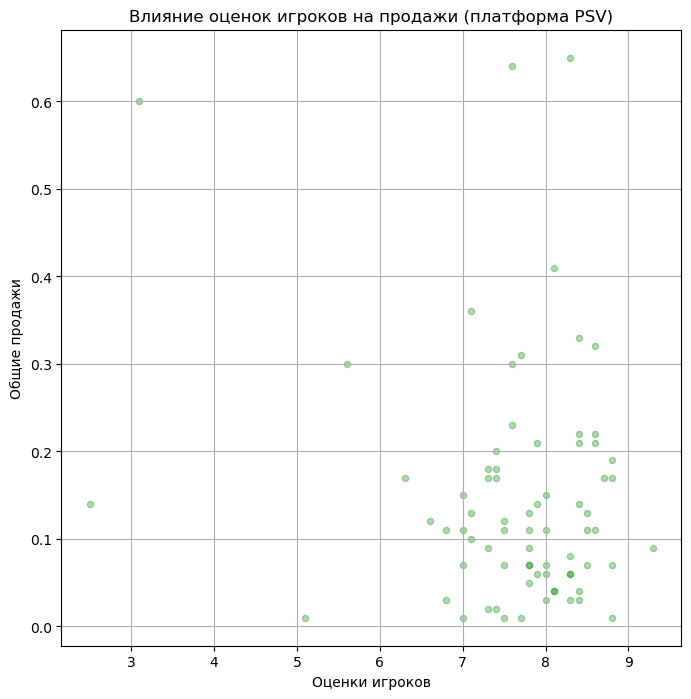

In [62]:
data_sales = data_sorted.query('platform == "PSV"')
data_sales.plot(x='user_score', y='total_sales',kind='scatter',alpha=0.3, figsize=(8,8), grid=True,c='green')
plt.title('Влияние оценок игроков на продажи (платформа PSV)')
plt.xlabel('Оценки игроков')
plt.ylabel('Общие продажи')
plt.show()

In [63]:
data_sales['total_sales'].corr(data_sales['user_score'])

-0.16845504978064446

**Коэффициент корреляции равен -0.2**

**Рассмотрев диаграммы рассеяния и рассчитав корреляцию между оценками пользователей и критиков и продажами игр на различных платформах, мы пришли к выводу, что в основном, корреляция между оценками критиков и продажами слабо положительная, а между оценками игроков и продажами корреляция чаще всего отсутствует. Также в основном чем выше оценки критиков, тем выше продажи игр на платформе. Высокие оценки игроков также увеливают продажи игр, однако при этом есть определенное количество игр с невысокими оценками пользователей, но с довольно хорошими продажами.**

#### Посмотрим на общее распределение игр по жанрам по актуальному периоду (2014-2016 год). Сначала построим круговую диаграмму. Затем сделаем сводную таблицу с количеством продаж игр в зависимости от жанра, для этого сделаем сводную таблицу.

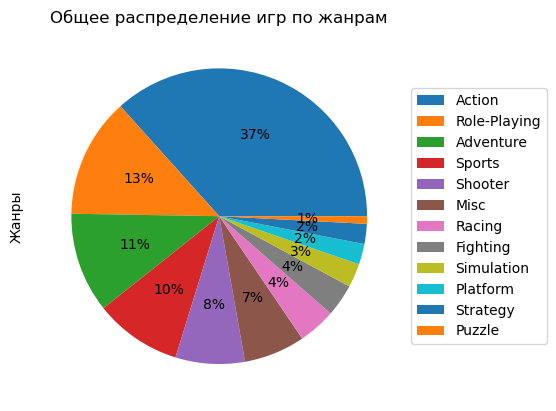

In [64]:
data_sorted['genre'].value_counts().plot(kind='pie', autopct='%1.0f%%',legend=True,labeldistance=None)
plt.title('Общее распределение игр по жанрам')
plt.ylabel('Жанры')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**На круговой диаграмме мы видим, что больше всего игр относятся к таким жанрам, как Action, Role-Playing, Adventure, Sports, Shooter.**

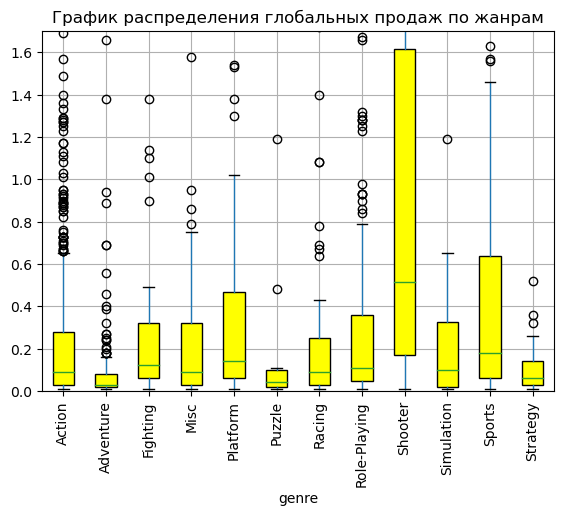

In [65]:
top_platforms.boxplot(by='genre',column='total_sales',patch_artist=True,boxprops=dict(facecolor='yellow'))
plt.title('График распределения глобальных продаж по жанрам')
plt.suptitle('')
plt.ylim(0,1.7)
plt.xticks(rotation=90)
plt.show()


**По диаграмме размаха мы видим, что самым прибыльным жанром является Shooter. Также довольно хорошие продажи у жанра Sports.**

### Составление портрета пользователя каждого региона

#### Определение самых популярных платформ для пользователя каждого региона

**Для этого сгруппируем данные по продажам на платформах в разных ригонах, а затем построим круговую диаграмму для наглядности.**

In [66]:
top_platform_na = data_sorted.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
top_platform_na

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

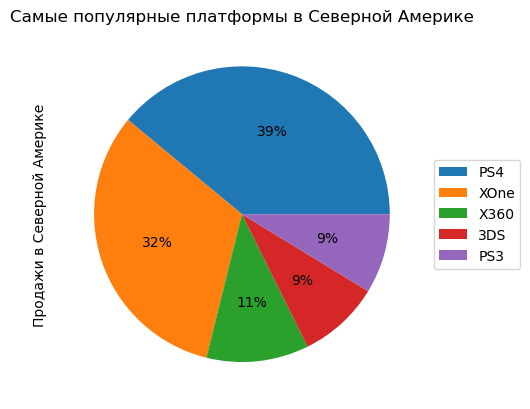

In [67]:
top_platform_na.plot(kind='pie', autopct='%1.0f%%',legend=True,labeldistance=None)
plt.title('Самые популярные платформы в Северной Америке')
plt.ylabel('Продажи в Северной Америке')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**В Северной Америке топ-платформы с наибольшими продажами - это платформы PS4, XOne, X360, 3DS, PS3.**

In [68]:
top_platform_eu = data_sorted.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
top_platform_eu

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

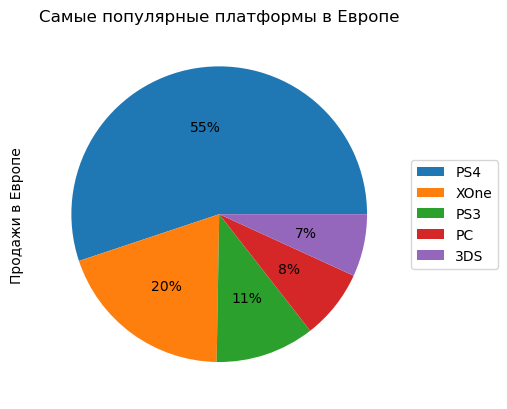

In [69]:
top_platform_eu.plot(kind='pie', autopct='%1.0f%%',legend=True,labeldistance=None)
plt.title('Самые популярные платформы в Европе')
plt.ylabel('Продажи в Европе')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**В Европе к 5 самым топовым платформам по продажам относятся PS4, XOne, PS3, PC, 3DS.**

In [70]:
top_platform_jp = data_sorted.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
top_platform_jp

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

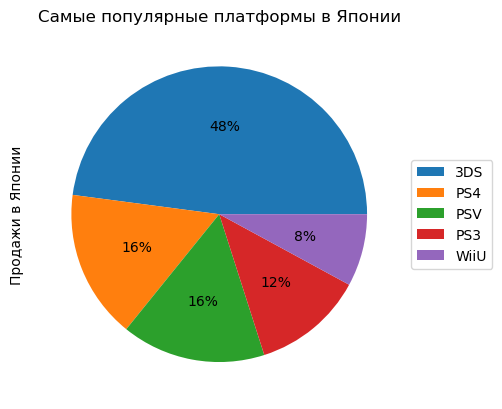

In [71]:
top_platform_jp.plot(kind='pie',autopct='%1.0f%%',legend=True,labeldistance=None)
plt.title('Самые популярные платформы в Японии')
plt.ylabel('Продажи в Японии')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**В Японии в топ-5 платформ по продажам входят 3DS, PS4, PSV, PS3, WiiU.**

**В Северной Аиерике наибольшая доля продаж приходится на платформы PS4 и XOne, доля продаж на них почти одинаковая. В Европе эти платформы тажке самые популярные, но доля продаж на PS4 более чем в 2 раза превышает долю продаж на XOne. В Японии наибольшая доля продаж на платфоре 3DS, а на втором месте PS4. Доля продаж на 3DS почти в 3 раза больше, чем на PS4.**

#### Определение самых популярных жанров для пользователя каждого региона

**Для этого сгруппируем данные по продажам разных жанров в разных регионах, затем построим круговые диаграммы для наглядности.**

In [72]:
top_genre_na = data_sorted.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
top_genre_na

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

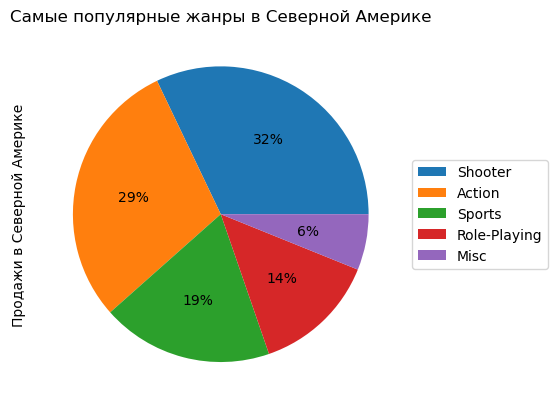

In [73]:
top_genre_na.plot(kind='pie', autopct='%1.0f%%', legend=True, labeldistance=None)
plt.title('Самые популярные жанры в Северной Америке')
plt.ylabel('Продажи в Северной Америке')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Самыми популярными жанрами в Северной Америке являются Shooter, Action, Sports, Role-Playing, Misc. Доля продаж жанров Action и Shooter почти одинаковая.**    

In [74]:
top_genre_eu = data_sorted.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
top_genre_eu

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

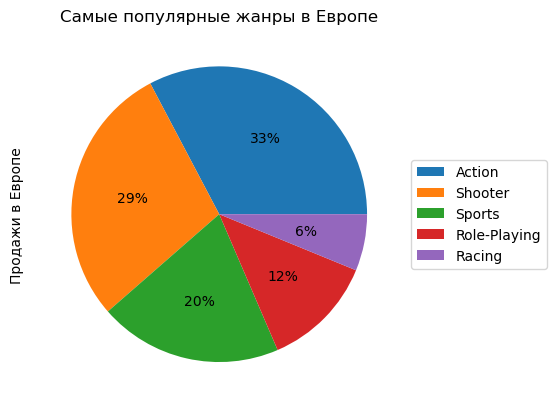

In [75]:
top_genre_eu.plot(kind='pie', autopct='%1.0f%%', legend=True, labeldistance=None)
plt.title('Самые популярные жанры в Европе')
plt.ylabel('Продажи в Европе')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Самыми популярными жанрами в Европе являются Action, Shooter, Sports, Role-PLaying, Racing. Продажи жанра Action немного превышают Shooter.**

In [76]:
top_genre_jp = data_sorted.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
top_genre_jp

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

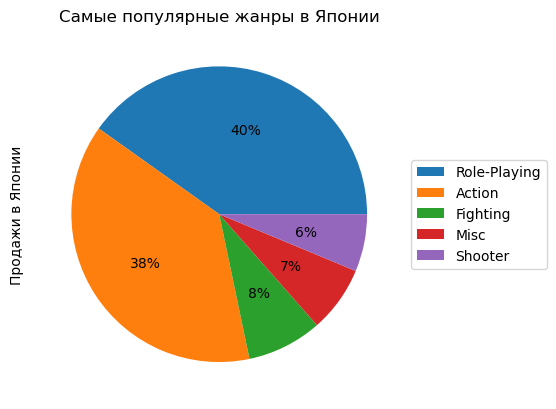

In [77]:
top_genre_jp.plot(kind='pie', autopct='%1.0f%%', legend=True, labeldistance=None)
plt.title('Самые популярные жанры в Японии')
plt.ylabel('Продажи в Японии')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Наиболее популярные жанры в Японии - это Role-Playing, Action, Fighting, Misc, Shooter. Продажи игр в жанрах Role-Playing и Action почти равны.**

**Изучив данные на диаграммах мы пришли к выводу, что в Северной Америке и Европе самые популярные жанры - это Action и Shooter, а в Японии на первом месте Role-Playing. Это можно обосновать культурными особенностями западного и восточного общества. На западе наибольшей популярностью в киноиндустрии и игровой индустрии пользуются боевики и игры с большим количеством экшена. В Японии и в восточной культуре очень популярными являются аниме в киноиндустрии и РПГ в игровой, так как именно этот жанр позволяет игроку перенестись в другой мир и стать его частью с помощью игры.**

#### Проверка влияния рейтинга ESRB на продажи в отдельном регионе

**Рейтинг ESRB - это система, которая выставляет возрастные рейтинги для видеоигр. Проанализируем, как данный рейтинг влияет на продажи игр в Северной Америке, Европе и Японии.**

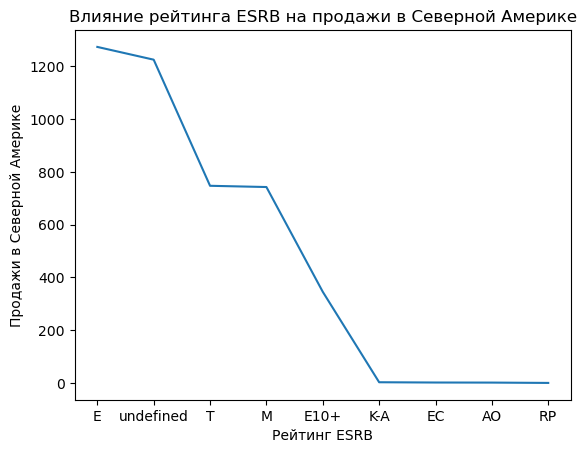

In [78]:
rating_na = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na
rating_na.plot(kind='line')
plt.title('Влияние рейтинга ESRB на продажи в Северной Америке')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи в Северной Америке')
plt.show()

**В Северной Америке больше всего продаются игры с возрастным рейтингом E,это игры, которые подходят для всех возрастных категорий. Игры с рейтингом EC (для детей младшего возраста) и AO (для взрослых старше 18 лет, в таких играх присутствует крайний уровень насилия и немотивированного убийства) пользуются наименьшим спросом.**

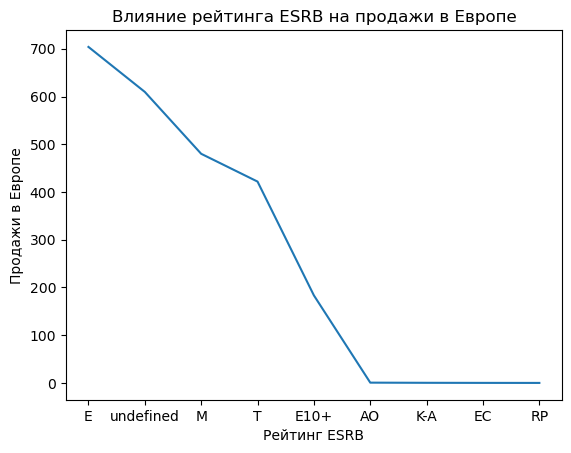

In [79]:
rating_eu = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu
rating_eu.plot(kind='line')
plt.title('Влияние рейтинга ESRB на продажи в Европе')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи в Европе')
plt.show()

**В Европе количество продаж игр в зависимости от рейтинга очень похожи на Северную Америку. Самая популярная категория E (игры, которые подходят для любого возраста), а самые невостребованные - это категории EC (для маленьких детей) и AO (для лиц 18+).**

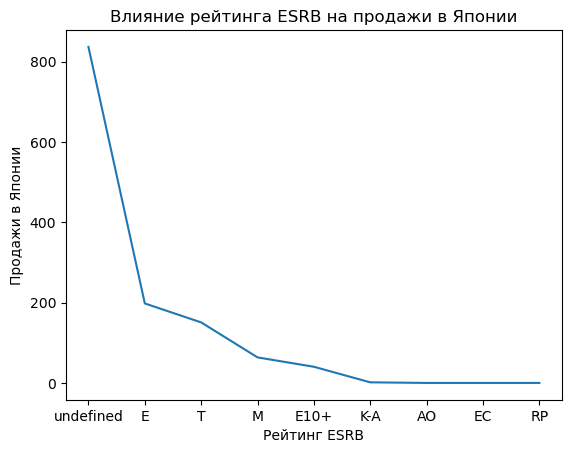

In [80]:
rating_jp = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp
rating_jp.plot(kind='line')
plt.title('Влияние рейтинга ESRB на продажи в Японии')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продажи в Японии')
plt.show()

**В Японии ситуация обстоит по-другому. Наибольшая часть игр не имеет определенного рейтинга. Это может быть связано с тем, что система ESRB не так популярна в восточных странах, как в западных. На втором месте с большим отрывом в Японии также игры категории E(для всех возрастов). Наименее популярные игры с рейтингом AO и EC (как и в западных странах). Однако в наших данных по Японии эти категории вообще не имеют продаж, в отличие от западных стран, где эти категории хоть и не популярны, но имеют невысокий спрос.**

### Проверка гипотез

#### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_O: Средний пользовательский рейтинг (user_score) платформы Xbox One = среднему пользовательскому рейтингу (user_score) платформы PC.

H_1: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ среднему пользовательскому рейтингу (user_score) платформы PC.

alpha = 0.05

In [81]:
rating_xbox_one = data_sorted.query('platform == "XOne"')['user_score']
rating_pc = data_sorted.query('platform == "PC"')['user_score']

results = st.ttest_ind (rating_xbox_one, rating_pc, equal_var = False, nan_policy='omit')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


**Не получилось отвергнуть нулевую гипотезу, то есть средний пользовательский рейтинг платформ Xbox One и PC равен.**

#### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные

H_0: Средний пользовательский рейтинг(user_score) жанра Action = среднему пользовательскому рейтингу(user_score) жанра Sports.

H_1: Средний пользовательский рейтинг(user_score) жанра Action ≠ среднему пользовательскому рейтингу(user_score) жанра Sports.

alpha = 0.05

In [82]:
rating_action = data_sorted.query('genre == "Action"')['user_score']
rating_sports = data_sorted.query('genre == "Sports"')['user_score']

results = st.ttest_ind (rating_action, rating_sports, equal_var = False, nan_policy='omit')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.182555038264477e-14
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу, это значит, что средние пользовательские рейтинги жанра Action и Sports не равны.**

### Общий вывод

В данном проекте мы работали с входными данными из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах. Наша задача заключалась в том, чтобы выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

На этапе предобработки мы привели названия столбцов к нижнему регистру, выявили пропуски в некоторых столбцах (name, genre year_of_release,critic_score,user_score и rating), а затем удалили, заполнили или оставили пропуски в зависимости от их количества и возможности заполнения. Также мы изменили тип данных в столбцах year_of_release (тип данных float64 заменили на int64,а в столбце user_score тип данных object заменили на float64). Также мы проверили датафрейм на наличие дубликатов, дубликаты не были выявлены.

Далее нами был проведен исследовательский анализ данных, в ходе которого мы изучили такие параметры, как:

1. Количество выпущенных в разные годы игр.
2. Измение продаж по платформам.
3. Определение актуального периода для построения прогноза на 2017 год.
4. Платформы, лидирующие по продажам.
5. Глобальные продажи в разбивке по платформам.
6. Влияние отзывов пользователей и критиков на продажи.
7. Общее распределение игр по жанрам.

В ходе исследовательского анализа данных нами было сделаны следующие выводы:

1) До 1995 года количество выпущенных игр было очень маленьким, далее начался постепенный рост. Особый рост наблюдается с 2005 года, а затем спад с 2010 года.

2) К платформам с наибольшими суммарными продажами относятся платформы PS2, X360, PS3, Wii,DS и PS. Характерный срок для появления новых и исчезновения старых платформ - это примерно 6-8 лет.

3) Наиболее прибыльными платформами в период с 2014 по 2016 год являются PS4,XOne,3DS. Максимальный рост наблюдался в 2015 году, за 2016 год мы имеет неполные данные, поэтому возможно спад на графике объясняется не снижением продаж на этих платформах, а неполнотой данных. Однако если сравнивать эти две платформы, то наиболее прибыльной является PS4, так как суммарные продажи на ней почти в 2 раза больше, чем на платформе XOne.

4) Изучив диаграмму размаха мы пришли к выводу, что медианные значения у лидирующих по продажам платформ(XOne и PS4) находятся примерно на одном уровне, значит в среднем прибыль на обеих достаточно высокая. Если посмотреть на ещё одну топовую платформу 3DS, то мы видим, что там медианное значение намного ниже, следовательно продажи на этой платформе также ниже, чем на предыдущих двух.

5) Рассмотрев диаграммы рассеяния и рассчитав корреляцию между оценками пользователей и критиков и продажами игр на различных платформах, мы пришли к выводу, что в основном, корреляция между оценками критиков и продажами слабо положительная, а между оценками игроков и продажами она довольно часто отсутствует. Также в основном, чем выше оценки критиков, тем выше продажи игр на платформе. Высокие оценки игроков не так сильно влияют на продажи игр, есть определенное количество игр с невысокими оценками пользователей, но с довольно хорошими продажами.

6) К самым прибыльным жанрам относятся Shooter и Sports. 

Далее мы составили портрет пользователя каждого региона:

1) Северная Америка
- В Северной Америке топ-платформы с наибольшими продажами - это платформы PS4, XOne, X360, 3DS, PS3
- Самыми популярными жанрами в Северной Америке являются Shooter, Action, Sports, Role-Playing, Misc. Доля продаж жанров Action и Shooter почти одинаковая
- В Северной Америке больше всего продаются игры с возрастным рейтингом E,это игры, которые подходят для всех возрастных категорий. Игры с рейтингом EC (для детей младшего возраста) и AO (для взрослых старше 18 лет) пользуются наименьшим спросом.

2) Европа
- В Европе к 5 самым топовым платформам по продажам относятся PS4, XOne, PS3, PC, 3DS
- Самыми популярными жанрами в Европе являются Action, Shooter, Sports, Role-PLaying, Racing. Продажи жанра Action немного превышают Shooter
- В Европе количество продаж игр в зависимости от рейтинга очень похожи на Северную Америку. Самая популярная категория E (игры, которые подходят для любого возраста), а самые невостребованные - это категории EC (для маленьких детей) и AO (для лиц 18+)

3) Япония
- В Японии в топ-5 платформ по продажам входят 3DS, PS4, PSV, PS3, WiiU
- Наиболее популярные жанры в Японии - это Role-Playing, Action, Fighting, Misc, Shooter. Продажи игр в жанрах Role-Playing и Action почти равны
- Наибольшая часть игр на имеет определенного рейтинга. Это может быть связано с тем, что система ESRB не так популярна в восточных странах, как в западных. На втором месте с большим отрывом в Японии также игры категории E(для всех возрастов). Наименее популярные игры с рейтингом AO и EC (как и в западных странах). Однако в наших данных по Японии эти категории вообще не имеют продаж, в отличие от западных стран, где эти категории хоть и не популярны, но имеют невысокий спрос

Затем мы проверили две гипотезы:

1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Не получилось отвергнуть нулевую гипотезу, то есть средний пользовательский рейтинг платформ Xbox One и PC равен.
2) Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports. Нам удалось отвергуть нулевую гипотезу, то есть средние пользовательские рейтинги жанра Action и Sports неравны.

Таким образом, на основании проведенного исследования мы выявили ряд закономерностей и особенностей, которые определяют успешность игры. Мы бы рекомендовали обратить внимание на платформу PS4, так как именно она на данный момент является самой перспективной и прибыльной. Что касается жанров, то стоит обратить внимание на жанры Shooter и Sports, так они приносят довольно хороший и стабильно высокий доход. Кроме того, важны оценки критиков, так они непосредственно влияют на продажи игр, чем выше оценки, тем лучше игра продается. Также не стоит забывать о культурных особенностях в разных странах. Данные выше рекомендации больше подходят для западных стран. Что касается Японии, там платформа 3DS более популярна, чем другие.